In [7]:
from lussi.imdb import *
from lussi.glimpse import *

df = load_imdb("622data_nogit/imdb")
glimpse(df) # before stripping string columns

2024-11-01 20:09:51.007 | INFO     | lussi.imdb:load_imdb:231 - Loaded augmented dataset from: augmented.parquet


Rows: 1047620
Columns: 37

Column preview:
--------------------------------------------------------------------------------
tconst               <category> tt0000001, tt0000002, tt0000003, tt0000004, tt0000005
primaryTitle         <string> Carmencita, Le clown et ses chiens, Poor Pierrot, Un bon bock, Blacksmith Scene
runtimeMinutes       <Int64> 1, 5, 5, 12, 1
numVotes             <int32> 2097, 283, 2106, 183, 2842
rating_bin           <int64> 5, 5, 6, 5, 6
num_actors           <float64> 4.0, 2.0, 5.0, 2.0, 3.0
actor_names          <string> Carmencita, William K.L. Dickson, William K.L. Dic..., Émile Reynaud, Gaston Paulin, Émile Reynaud, Julien Pappé, Émile Reynaud, Gaston..., Émile Reynaud, Gaston Paulin, Charles Kayser, John Ott, Thomas A. Edison
Action               <int64> 0, 0, 0, 0, 0
Adult                <int64> 0, 0, 0, 0, 0
Adventure            <int64> 0, 0, 0, 0, 0
Animation            <int64> 0, 1, 1, 1, 0
Biography            <int64> 0, 0, 0, 0, 0
Comedy               <in

In [9]:
glimpse(df)

Rows: 1047620
Columns: 37

Column preview:
--------------------------------------------------------------------------------
tconst               <category> tt0000001, tt0000002, tt0000003, tt0000004, tt0000005
primaryTitle         <string> Carmencita, Le clown et ses chiens, Poor Pierrot, Un bon bock, Blacksmith Scene
runtimeMinutes       <Int64> 1, 5, 5, 12, 1
numVotes             <int32> 2097, 283, 2106, 183, 2842
rating_bin           <int64> 5, 5, 6, 5, 6
num_actors           <float64> 4.0, 2.0, 5.0, 2.0, 3.0
actor_names          <string> Carmencita, William K.L. Dickson, William K.L. Dic..., Émile Reynaud, Gaston Paulin, Émile Reynaud, Julien Pappé, Émile Reynaud, Gaston..., Émile Reynaud, Gaston Paulin, Charles Kayser, John Ott, Thomas A. Edison
Action               <int64> 0, 0, 0, 0, 0
Adult                <int64> 0, 0, 0, 0, 0
Adventure            <int64> 0, 0, 0, 0, 0
Animation            <int64> 0, 1, 1, 1, 0
Biography            <int64> 0, 0, 0, 0, 0
Comedy               <in

In [14]:
## This assumes a number of votes already. Unlikely. 
df_dropped1 = df.drop(columns=['tconst', 'primaryTitle', 'actor_names'])
model1, importance1, metrics1, predictions1 = train_and_evaluate_rf(df_dropped1)
generate_summary_report(*predictions1)

Top 10 most important features:
                      feature  importance
0              runtimeMinutes    0.258849
1                    numVotes    0.224396
31    experienced_actor_count    0.120055
2                  num_actors    0.116886
32  experienced_actors_likert    0.031849
10                Documentary    0.031400
17                     Horror    0.025186
8                      Comedy    0.022280
11                      Drama    0.017050
3                      Action    0.013409

Model Performance:
R2 Score: 0.320
Root Mean Squared Error: 1.130

Total model train and execution time: 0:05:23.462540 


**Accuracy Measures:**
- 42.25% exact matches (got the rating bin exactly right)
- 84.10% within 1 bin (either exact or just one bin off)

**Distribution of Errors:**
- 42.3% perfect predictions (0 bins off)
- 41.8% off by just 1 bin (22.8% low + 19.0% high)
- Only 15.9% off by more than 1 bin
- Major mistakes (off by 3 or more bins): 4.0%

**Putting It in Perspective:**
If you'r

In [16]:
print(type(model1))
print(type(importance1))
print(type(metrics1))
print(type(predictions1)) 


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'pandas.core.frame.DataFrame'>
<class 'tuple'>
<class 'tuple'>


In [11]:
# This is a new program with no votes at all. 
df_dropped2 = df.drop(columns=['tconst', 'primaryTitle', 'actor_names', 'numVotes'])
model2, importance2, metrics2, predictions2 = train_and_evaluate_rf(df_dropped2)
generate_summary_report(*predictions2)

Top 10 most important features:
                      feature  importance
0              runtimeMinutes    0.335126
1                  num_actors    0.155563
30    experienced_actor_count    0.155217
31  experienced_actors_likert    0.042990
9                 Documentary    0.037969
16                     Horror    0.029842
7                      Comedy    0.027600
10                      Drama    0.020009
4                   Adventure    0.015317
22                    Romance    0.015049

Model Performance:
R2 Score: 0.220
Root Mean Squared Error: 1.210

Total model train and execution time: 0:03:53.498588 


**Accuracy Measures:**
- 39.10% exact matches (got the rating bin exactly right)
- 81.72% within 1 bin (either exact or just one bin off)

**Distribution of Errors:**
- 39.1% perfect predictions (0 bins off)
- 42.6% off by just 1 bin (23.1% low + 19.5% high)
- Only 18.3% off by more than 1 bin
- Major mistakes (off by 3 or more bins): 5.0%

**Putting It in Perspective:**
If you'r

In [26]:
import plotly.express as px

def plot_importance(importance_df, top_n=25):
    """
    Plot horizontal feature importance bars from an existing importance DataFrame.
    
    Parameters:
    -----------
    importance_df : pandas DataFrame
        DataFrame with 'feature' and 'importance' columns
    top_n : int, default=10
        Number of top features to show
    """
    # Take top N features but reverse order for bottom-to-top display
    plot_df = importance_df.head(top_n).iloc[::-1]
    
    # Create horizontal bar plot
    fig = px.bar(
        plot_df,
        y='feature',  # switched from x to y
        x='importance',  # switched from y to x
        text=plot_df['importance'].round(3),
        title='Top Feature Importances',
        labels={'importance': 'Importance Score', 'feature': 'Feature'},
        orientation='h'  # horizontal orientation
    )
    
    # Customize layout
    fig.update_layout(
        width=800,
        height=500,
        showlegend=False,
        title_x=0.5,
        margin=dict(t=50, l=200, r=50, b=50),  # adjusted left margin for feature names
        yaxis={'dtick': 1}  # ensure all feature names are shown
    )
    
    # Customize bars
    fig.update_traces(
        marker_color='#2563eb',
        textposition='outside',
        texttemplate='%{text:.3f}'
    )
    
    fig.show()

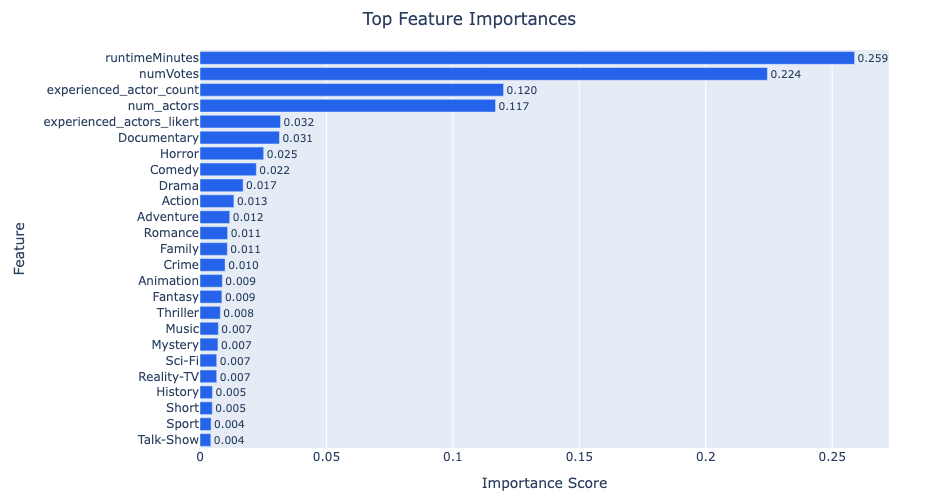

In [27]:
plot_importance(importance1)

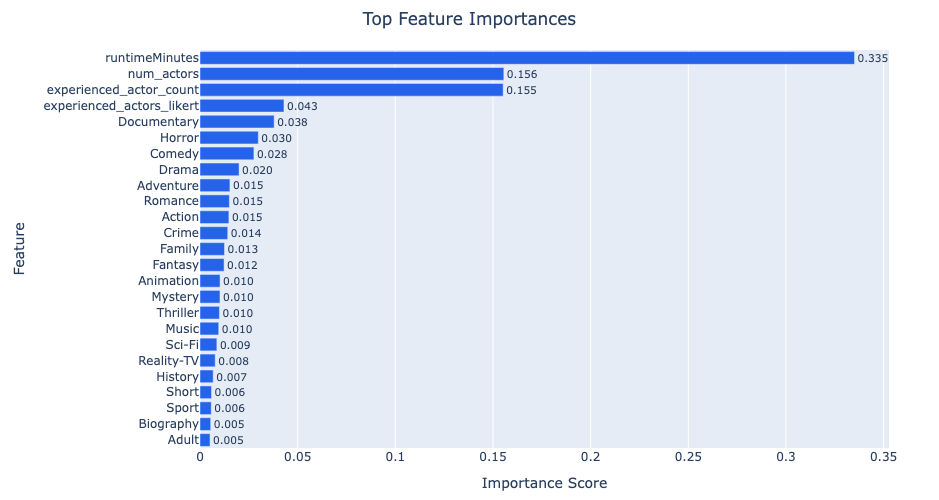

In [28]:
plot_importance(importance2)